<a href="https://colab.research.google.com/github/eminbustun/CS210/blob/main/Final_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**IMDB Movies** 


Project Members:
-------------------

Bülent Emin Üstün - 27822

Tolga Mert Çalışkan - 29335

Ahmet Eren Çağatay - 29041

Ataberk Cem Ünal - 29088

Ataberk Uysal - 29213

Umut Cevri - 29504


# Introduction


As it was stated in the proposal report, our aim is to find the correlation between movie genres and the ratings in the given dataset. For each genre, we have collected its corresponding movie rating. After that, we are going to represent graph about the genre and rating. In addition, we have found the high rated genre combinations, by using these combinations we came to the conclusion of our hypothesis. At the end of the project, we accomplished a machine learing model.

# Problem Definiton


In our dataset, we only see the movies, their genres and their ratings. Moreover, the dataset we use have some columns that are empty. The end goal of this project is we first fill the empty columns. After making this adjustments, we will find a correlation between ratings and genres. At the end, we will present a graph about the correlation and machine learning model.

First, we will consider dropping the empty columns, even further we are going to drop some columns that we will not use. Secondly, with the help of pandas, numpy, and matplotlib library, we will find correlation between genre and rating, and provide graphs about this correlation. Finally, we will create machine learning model and conduct a hypothesis test. The end goal is whether there is any correlation between genre and rating.

# Utilized Datasets


In this project, we will use the given
dataset which is https://drive.google.com/file/d/1-1aZGfAlXgtn0gLfGpZdqXGGkfB_UbkG/view
. This dataset has 993 observations. It has 14 columns with different headers which are Rank, Title, Genre, Descrition, Director, Actors, Year, Run Time(minutes), Rating, Votes, Revenue(millions), Metascore, IMDB ID and MovieLensID. The data types the columns are integer, object(string), object(string), object(string), object(string), object(string), integer, integer, float, float, integer, float, float, integer, and float respectively. Below bar chart represents movie numbers with corresponding genres.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from os.path import join
from matplotlib.backend_bases import key_press_handler

%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount("./drive")

Drive already mounted at ./drive; to attempt to forcibly remount, call drive.mount("./drive", force_remount=True).


In [ ]:
fname = "IMDB-Movie-Data-withID.csv"
path_prefix = './drive/My Drive/' 
df = pd.read_csv(join(path_prefix, fname))

df.head(5)


,Unnamed: 0,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,imdbID,movieLensID
0,0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,2015381,112852.0
1,1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,1446714,94864.0
2,2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0,4972582,166534.0
3,3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0,3470600,167036.0
4,4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0,1386697,135536.0


In [ ]:
df.describe()

,Unnamed: 0,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,imdbID,movieLensID
count,993.00000,993.000000,993.000000,993.000000,993.00000,9.930000e+02,866.000000,930.000000,9.930000e+02,993.000000
mean,496.00000,500.813696,2012.790534,113.191339,6.72578,1.703585e+05,83.414677,58.965591,2.085602e+06,114666.293051
std,286.79871,288.401092,3.206664,18.848977,0.93964,1.892393e+05,103.459652,17.214686,1.354632e+06,39546.213349
min,0.00000,1.000000,2006.000000,66.000000,1.90000,6.100000e+01,0.000000,11.000000,2.066340e+05,44193.000000
25%,248.00000,251.000000,2010.000000,100.000000,6.20000,3.630000e+04,13.650000,47.000000,1.059786e+06,82459.000000
50%,496.00000,501.000000,2014.000000,110.000000,6.80000,1.115580e+05,48.150000,59.000000,1.703957e+06,111743.000000
75%,744.00000,749.000000,2016.000000,123.000000,7.40000,2.413590e+05,115.132500,72.000000,2.937696e+06,155846.000000
max,992.00000,1000.000000,2016.000000,191.000000,9.00000,1.791916e+06,936.630000,100.000000,7.371706e+06,206351.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 993 entries, 0 to 992
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          993 non-null    int64  
 1   Rank                993 non-null    int64  
 2   Title               993 non-null    object 
 3   Genre               993 non-null    object 
 4   Description         993 non-null    object 
 5   Director            993 non-null    object 
 6   Actors              993 non-null    object 
 7   Year                993 non-null    int64  
 8   Runtime (Minutes)   993 non-null    int64  
 9   Rating              993 non-null    float64
 10  Votes               993 non-null    int64  
 11  Revenue (Millions)  866 non-null    float64
 12  Metascore           930 non-null    float64
 13  imdbID              993 non-null    int64  
 14  movieLensID         993 non-null    float64
dtypes: float64(4), int64(6), object(5)
memory usage: 116.5+ K

As you can see there is a unnecessary row named Unnamed: 0. We will get rid of this row since it has no use. 


In [ ]:
df = df.drop(['Unnamed: 0'], axis=1)
#df = df.reset_index()

Now, let's see if there are any null values. If there are, we will get rid of them.

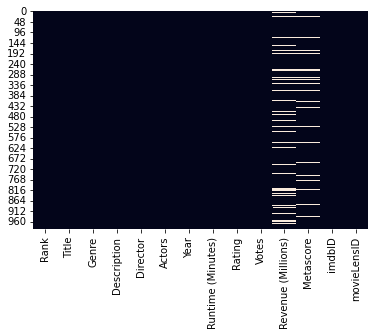

In [ ]:
sns.heatmap(df.isnull(), cbar=False)
plt.show()

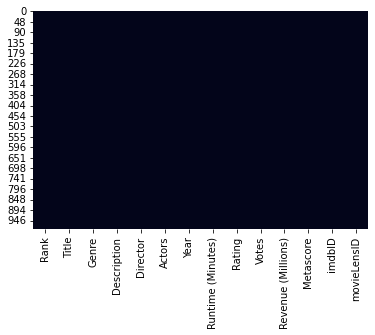

In [ ]:
df = df.dropna()
sns.heatmap(df.isnull(), cbar=False)
plt.show()

# There are no null values.

# Data Exploration


We utilized only one dataset which we provided the link on the above. We consider that this dataset is highly useful for our project.




# Exploratory Data Analysis



> Visualizations and Charts




We prepared different charts to present a better experience for the users.Such as;

- Average movie rating of corresponding genre
- Boxplots




Number of Movies and their Genres
----------------------

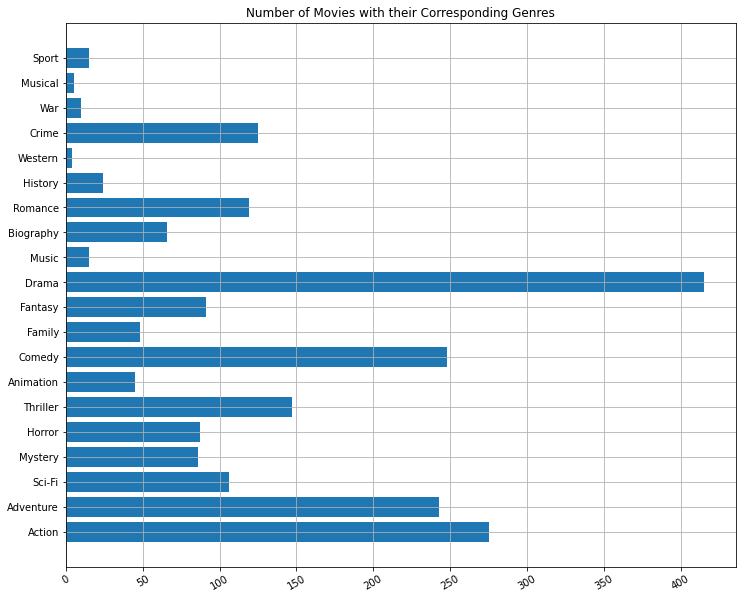

In [ ]:

df_copy = df.copy()

dct = {}

for i in df_copy["Genre"]:

  

  for k in i.split(","):

    if k in dct.keys():
      dct[k] += 1

    else:
      dct[k] = 1 

names = list(dct.keys())
values = list(dct.values())
plt.figure(figsize=(12,10))
plt.barh(range(len(dct)), values, tick_label=names)
plt.title("Number of Movies with their Corresponding Genres")
plt.xticks(rotation = 30)
plt.grid()
plt.savefig("bar_chart.png")
plt.show()
plt.close()


**Genres and their Average Movie Ratings**

<ipython-input-10-88c88f779a13>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy["Genre"][i] = df_copy["Genre"][i].split(",")


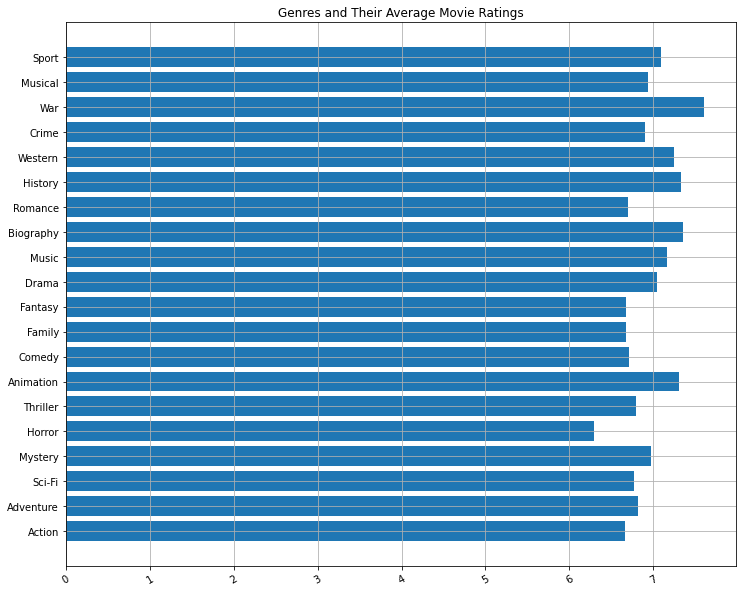

In [ ]:
df_copy = df.copy()
df_copy = df_copy.reset_index()
dct1 = {}
for i in dct.keys():
  if i not in dct1.keys():
    dct1[i] = 0


for i in range(df_copy.shape[0]):
  df_copy["Genre"][i] = df_copy["Genre"][i].split(",")
  for k in df_copy["Genre"][i]:
    if k in dct1.keys():
      dct1[k] += df_copy["Rating"][i]

      
for i in dct:
 dct1[i] = (dct1[i] / dct[i])

values1 = list(dct1.values())
names1 = list(dct1.keys())
plt.figure(figsize=(12,10))
plt.barh(names1, values1, tick_label=names1)

plt.title("Genres and Their Average Movie Ratings")
plt.xticks(rotation = 30)
plt.savefig("bar_chart1.png")
plt.grid()
plt.show()



The distribution of `Rating` column

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


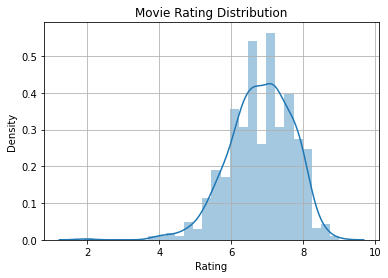

In [ ]:
ax = sns.distplot(df['Rating'])
ax.set_title("Movie Rating Distribution")
ax.grid()
plt.show()

Distribution of Metascore and Ratings column

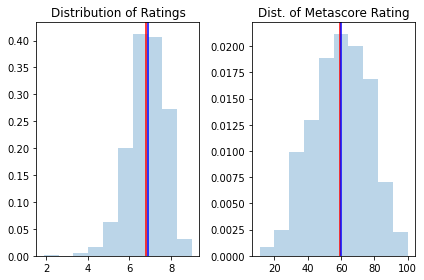

In [ ]:
fig, axes = plt.subplots(1,2)
# plot IMDB Ratings distribution, its mean, and median
axes[0].set_title('Distribution of Ratings')
axes[0].hist(df['Rating'], alpha=0.3, density=True)
axes[0].axvline(df['Rating'].mean(), 0, 1, c='r')
axes[0].axvline(df['Rating'].median(), 0, 1, c='b')

axes[1].set_title('Dist. of Metascore Rating')
axes[1].hist(df['Metascore'], alpha=0.3, density=True)
axes[1].axvline(df['Metascore'].mean(), 0, 1, c='r')
axes[1].axvline(df['Metascore'].median(), 0, 1, c='b')

plt.tight_layout()
plt.show()

**We look for outliers both upper and lower bound.**




/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2657: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
/usr/local/lib/python3.8/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcou

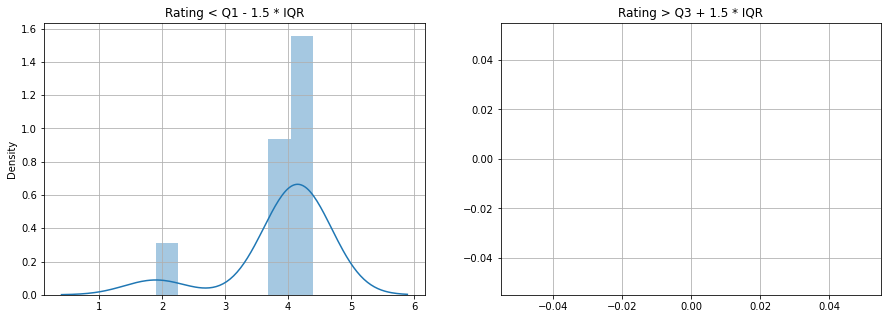

In [ ]:
import warnings

fig, axes = plt.subplots(1, 2, figsize=(15,5))
p = df['Rating'].values
Q1 = np.percentile(p, 25)
Q3 = np.percentile(p, 75)
IQR = Q3 - Q1


n = p[p < (Q1 - 1.5 * IQR)]

outliers = p[p > (Q3 + 1.5 * IQR)]

sns.distplot(n, ax=axes[0])
axes[0].set_title("Rating < Q1 - 1.5 * IQR")
axes[0].grid()

sns.distplot(outliers, ax=axes[1])
axes[1].set_title("Rating > Q3 + 1.5 * IQR")
axes[1].grid()
fig.show()


#for removing warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 
warnings.filterwarnings("ignore", category=FutureWarning) 

plt.show()

**Let's make a boxplot if we have any outliers and we can see how it is skewed.**

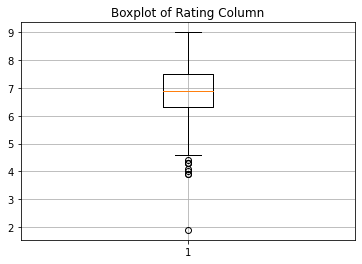

In [ ]:
# WITH OUTLIERS

fig = plt.figure()

plt.boxplot(df[['Rating']].T)
plt.title("Boxplot of Rating Column")
plt.grid()
plt.show()

Eliminating the outliers

In [ ]:
#Eliminate outliers
LOW_POINT = Q1 - 1.5 * IQR
MAX_POINT = Q3 + 1.5 * IQR

df = df[(df["Rating"] > LOW_POINT) & (df["Rating"] < MAX_POINT)]
df.reset_index(inplace= True,drop=True);

The boxplot without any outliers.

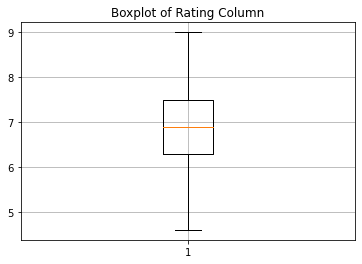

In [ ]:
fig = plt.figure()
plt.boxplot(df[['Rating']].T)
plt.title("Boxplot of Rating Column")
plt.grid()
plt.show()

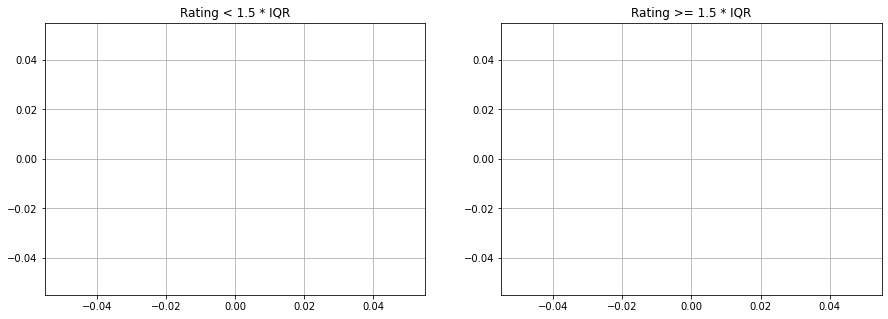

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))
p = df['Rating'].values
Q1 = np.percentile(p, 25)
Q3 = np.percentile(p, 75)
IQR = Q3 - Q1


n = p[p < (Q1 - 1.5 * IQR)]

outliers = p[p > (Q3 + 1.5 * IQR)]

sns.distplot(n, ax=axes[0])
axes[0].set_title("Rating < 1.5 * IQR")
axes[0].grid()

sns.distplot(outliers, ax=axes[1])
axes[1].set_title("Rating >= 1.5 * IQR")
axes[1].grid()
fig.show()

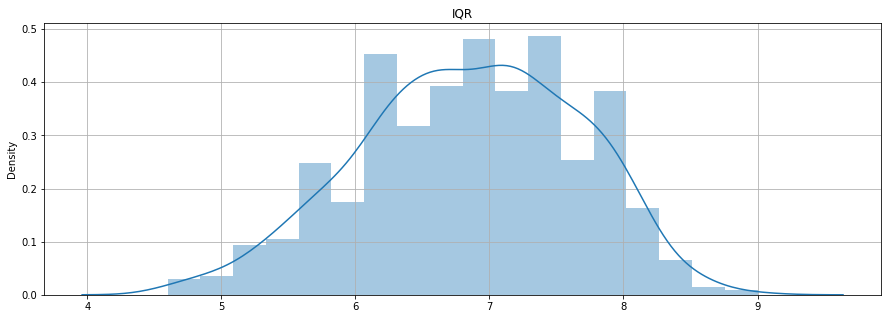

In [ ]:
fig, axes = plt.subplots(figsize=(15,5))
n = p[(p > (Q1 - 1.5 * IQR)) & (p < (Q3 + 1.5 * IQR))]
sns.distplot(n)
axes.set_title("IQR")
axes.grid()

**Correlation between columns**

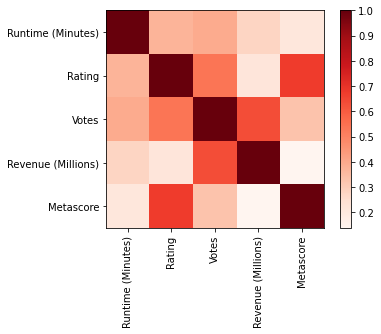

In [ ]:
corr = df.drop(["Rank","Title","Description","Director","Actors", "Year", "imdbID","movieLensID"],axis=1).corr()
corr_vals = corr.values

fig = plt.figure()
plt.imshow(corr_vals,cmap="Reds")

plt.yticks(range(len(corr.columns)),corr.columns)
plt.xticks(range(len(corr.columns)),corr.columns,rotation=90)

plt.colorbar()
plt.show()

Genre Combinations and their Average Movie Ratings. In this part we masked the database to gain combinations. Moreover, we only take account of the combinations that are higher than 10. 

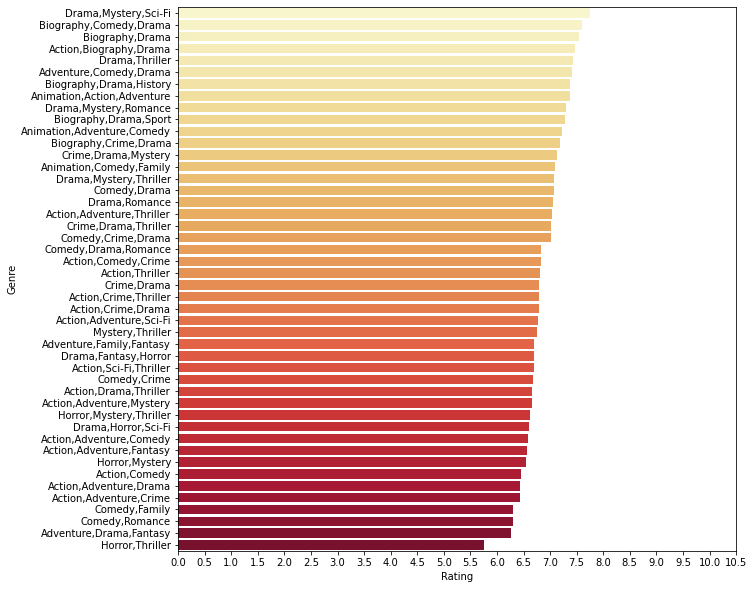

In [ ]:
count = df.groupby('Genre')['Genre'].count()
df_n = df.groupby('Genre').filter(lambda x: x['Genre'].count() >= 5)
mask = df_n['Genre'].str.contains(",")
df_n = df_n.loc[mask]
plt.figure(figsize=(10,10))
genre_ratings = df_n.groupby('Genre')['Rating'].mean()
genre_ratings = genre_ratings.sort_values(ascending=False)
ax = sns.barplot(y=genre_ratings.index, x=genre_ratings.values, palette='YlOrRd')
ax.set_xlabel('Rating')
ax.set_xticks(np.arange(0, 11, 0.5))

plt.show()

# Test Statistic

Null Hypothesis (H0): There is no correlation between genre and movie rating.

Alternative Hypothesis (H1): There is a correlation between genre and movie rating.

We take alpha (level of significance) as 0.05.

In [ ]:
#Creating new data frame takes every genre type as column.

genrdict = {}
df = df.dropna().reset_index()
titles = df["Title"]

for i in df["Genre"]:

  i = i.split(",")

  for k in i:

    if k not in genrdict.keys():
      genrdict[k] = [0 for i in range(len(titles))]

for q in range(len(df["Genre"])) :
  df["Genre"][q] = df["Genre"][q].split(",")

genrelist = list(genrdict.keys())

for x in range(len(genrelist)) :

  for y in range(len(df["Genre"])) :
    
    
    for z in range(len(df["Genre"][y])) :
      # print(df["Genre"][y][z])

      if genrelist[x] == df["Genre"][y][z] :
        genrdict[genrelist[x]][y] = 1 

df_dict = pd.DataFrame(genrdict,index = titles)    

df_dict = df_dict.reset_index()

ratings = df['Rating']



df_dict['Rating'] = ratings

<ipython-input-21-e54fb48447b0>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Genre"][q] = df["Genre"][q].split(",")


In [ ]:
df_dict_cop = df_dict.copy()

df_dict_cop = df_dict_cop.round(0)

df_dict_cop

,Title,Action,Adventure,Sci-Fi,Mystery,Horror,Thriller,Animation,Comedy,Family,...,Music,Biography,Romance,History,Western,Crime,War,Musical,Sport,Rating
0,Guardians of the Galaxy,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8.0
1,Prometheus,0,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7.0
2,Split,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,7.0
3,Sing,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,7.0
4,Suicide Squad,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
818,Resident Evil: Afterlife,1,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6.0
819,Project X,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,7.0
820,Hostel: Part II,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6.0
821,Step Up 2: The Streets,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,6.0


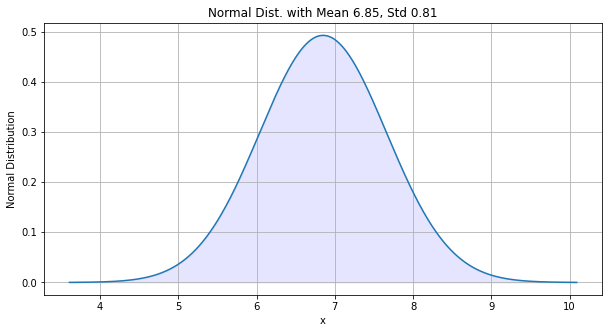

In [ ]:
from scipy.stats import ttest_1samp
from scipy import stats
mean = round(df['Rating'].mean(),2)

std = round(df['Rating'].std(),2)

n = len(df)

offset = 4 * std

x = np.linspace(mean - offset, mean + offset, n)

y = stats.norm.pdf(x,mean,std)

plt.figure(figsize=(10,5))

plt.plot(x,y)

plt.grid()

plt.xlabel("x")
plt.ylabel("Normal Distribution")

plt.fill_between(x, y, alpha=0.1, color="b")
plt.title(f"Normal Dist. with Mean {mean}, Std {std}")
plt.show()

We tested our hypotheses with chi-square distribution.


In [ ]:
from scipy.stats import chi2_contingency

ls = ["Action","Adventure","Sci-Fi","Mystery","Horror","Thriller","Animation","Comedy","Family","Fantasy","Drama","Music","Biography","Romance","History","Western","Crime", "War","Musical"]

alpha = 0.05

for i in ls:

  contingency = pd.crosstab(df_dict_cop[i], df_dict_cop["Rating"])

  chi, pval, dof, thrash = chi2_contingency(contingency)


  
  


  if pval < alpha:
    print("There is a correlation between", i ,"and its movie ratings.")
  else:
    print("There is no correlation between", i ,"and its movie ratings.")





There is a correlation between Action and its movie ratings.
There is no correlation between Adventure and its movie ratings.
There is no correlation between Sci-Fi and its movie ratings.
There is no correlation between Mystery and its movie ratings.
There is a correlation between Horror and its movie ratings.
There is no correlation between Thriller and its movie ratings.
There is a correlation between Animation and its movie ratings.
There is no correlation between Comedy and its movie ratings.
There is no correlation between Family and its movie ratings.
There is no correlation between Fantasy and its movie ratings.
There is a correlation between Drama and its movie ratings.
There is no correlation between Music and its movie ratings.
There is a correlation between Biography and its movie ratings.
There is no correlation between Romance and its movie ratings.
There is a correlation between History and its movie ratings.
There is no correlation between Western and its movie ratings.


From the above output. It can be said that there is no correlation between movie genre and its ratings. However, in the Machine Learning part, we will look more detailed

# Machine Learning

In machine learning part, we implemented only Regression since what we want to predict is continuous variable.

##Step 1: Genre 
In our dataset, the genre column was not efficient for applying a machine learning method. That's why, we created an another dataframe from our previous dataset.

In [ ]:
#Creating new data frame takes every genre type as column.
df_copyE = df.copy()

genrdict = {}
#df = df.dropna().reset_index()
titles = df_copyE["Title"]

for i in df_copyE["Genre"]:

  #i = i.split(",")

  for k in i:

    if k not in genrdict.keys():
      genrdict[k] = [0 for i in range(len(titles))]



genrelist = list(genrdict.keys())

for x in range(len(genrelist)) :

  for y in range(len(df_copyE["Genre"])) :
    
    
    for z in range(len(df_copyE["Genre"][y])) :
      # print(df["Genre"][y][z])

      if genrelist[x] == df_copyE["Genre"][y][z] :
        genrdict[genrelist[x]][y] = 1 

df_dict = pd.DataFrame(genrdict,index = titles)       


In [ ]:
df_dict.head(10)

# In this dataset, we didn't use reset_index method because we did not want it to be used for machine learning process

,Action,Adventure,Sci-Fi,Mystery,Horror,Thriller,Animation,Comedy,Family,Fantasy,Drama,Music,Biography,Romance,History,Western,Crime,War,Musical,Sport
Title,,,,,,,,,,,,,,,,,,,,
Guardians of the Galaxy,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Prometheus,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Split,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Sing,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0
Suicide Squad,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
The Great Wall,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
La La Land,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0
The Lost City of Z,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
Passengers,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0


##Step 2: train_test_split

We divided our new dataset into 60% train, 20% test and 20& validation. We used partioning like this because our dataset was not big. Moreover, we did this to avoid overfitting.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
X = df_dict
y = df["Rating"]

# 60 - 40
X_train, X_remaining, y_train, y_remaining = train_test_split(X,y,test_size = 0.40, random_state = 0)
#20 - 20
X_test, X_val, y_test, y_val = train_test_split(X_remaining, y_remaining, test_size = 0.50, random_state = 0)

##Step 3: Fitting our model 

[-0.10019981  0.12480405  0.15755768  0.13286751 -0.44970041  0.08451002
  0.76865724 -0.03169473 -0.06841131  0.09631426  0.35417685  0.18254713
  0.41483707 -0.01199759  0.16710344  0.4825762   0.07972845  0.78211658
  0.43390842  0.08188678]


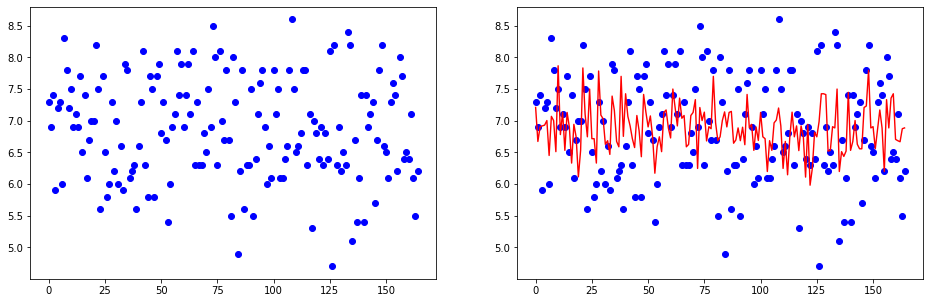

In [ ]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(16,5))

model = LinearRegression()

model.fit(X_train,y_train)

y_pred = model.predict(X_test)

X_test_arranged = np.arange(0,len(X_test),1)

ax1.scatter(X_test_arranged, y_test, color="blue")

ax2.scatter(X_test_arranged, y_test, color="blue")

ax2.plot(X_test_arranged, y_pred, color='red', linewidth=1.4)



print(model.coef_)
plt.show()

##Set 4: Correlation

In [ ]:
r_2 = model.score(X_test, y_test)
print("R-squared value: ", r_2)

print("------------------------")

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print("MSE: {}".format(mse))
print("RMSE: {}".format(rmse))
print("MAE: {}".format(mae))

R-squared value:  0.23034489882187925
------------------------
MSE: 0.5080475654026886
RMSE: 0.7127745544018028
MAE: 0.5813740069890826


#Conclusion

In conclusion, in the data we examine according to the result of our ML model that we used proves that there is a weak correlation between genre of movies and rating, as it can be seen from the result of error functions which resulted in a low R-squared value : 0.23. When r value is 1, the data has 100% correlation, and when r value is equal to 0, it has 0% correlation. The fact that our value is much closer to 0 proves that there is a low correlation or there is no correlation.


#Future Work

For future work, we need bigger database because we think that there has to be a correlation between a movie genre and its rating. 

# Work Division

We did everything together.